In [ ]:
from google.colab import files
import io
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.mixture import GaussianMixture
from pylab import concatenate, normal
from scipy.stats import ks_2samp
from datetime import date

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['owid-covid-data.csv']))

Saving owid-covid-data.csv to owid-covid-data.csv


In [ ]:
df=df.fillna(0)
df_ind = df.loc[df["location"] == "India"]
df_sa = df.loc[df["location"] == "South Africa"]
df_zim = df.loc[df["location"] == "Zimbabwe"]
df_afg = df.loc[df["location"] == "Afghanistan"]
df_us = df.loc[df["location"] == "United States"]
df_uk = df.loc[df["location"] == "United Kingdom"]
df_ger = df.loc[df["location"] == "Germany"]
df_ind=df_ind.iloc[:,[3,11]]
df_sa=df_sa.iloc[:,[3,11]]
df_zim=df_zim.iloc[:,[3,11]]
df_afg=df_afg.iloc[:,[3,11]]
df_us=df_us.iloc[:,[3,11]]
df_uk=df_uk.iloc[:,[3,11]]
df_ger=df_ger.iloc[:,[3,11]]

In [ ]:
df_zim=df_zim.iloc[:600,:]
df_sa=df_sa.iloc[:650,:]
df_afg=df_afg.iloc[:600,:]
df_us=df_us.iloc[:680,:]
df_uk=df_uk.iloc[:580,:]
df_ger=df_ger.iloc[:550,:]

In [ ]:
df_ind.reset_index(inplace=True,drop=True)
df_zim.reset_index(inplace=True,drop=True)
df_sa.reset_index(inplace=True,drop=True)
df_afg.reset_index(inplace=True,drop=True)
df_us.reset_index(inplace=True,drop=True)
df_uk.reset_index(inplace=True,drop=True)
df_ger.reset_index(inplace=True,drop=True)

In [ ]:
m,d,y=df_ind.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_ind.index.max()+1):
  m1,d1,y1=df_ind.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_ind.iloc[i,0]=(date1-date0).days
  if df_ind.iloc[i,1]==0:
    df_ind.iloc[i,1]=(df_ind.iloc[i-1,1]+df_ind.iloc[i+1,1])/2
df_ind['new_cases_per_million']=df_ind['new_cases_per_million'].astype(int)

m,d,y=df_sa.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_sa.index.max()+1):
  m1,d1,y1=df_sa.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_sa.iloc[i,0]=(date1-date0).days
  if df_sa.iloc[i,1]==0:
    df_sa.iloc[i,1]=(df_sa.iloc[i-1,1]+df_sa.iloc[i+1,1])/2
df_sa['new_cases_per_million']=df_sa['new_cases_per_million'].astype(int)

m,d,y=df_zim.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_zim.index.max()+1):
  m1,d1,y1=df_zim.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_zim.iloc[i,0]=(date1-date0).days
  if df_zim.iloc[i,1]==0:
    df_zim.iloc[i,1]=df_zim.iloc[i+1,1]/2
    df_zim.iloc[i+1,1]=df_zim.iloc[i+1,1]-df_zim.iloc[i,1]
df_zim['new_cases_per_million']=df_zim['new_cases_per_million'].astype(int)

m,d,y=df_afg.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_afg.index.max()+1):
  m1,d1,y1=df_afg.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_afg.iloc[i,0]=(date1-date0).days
  if df_afg.iloc[i,1]==0:
    df_afg.iloc[i,1]=(df_afg.iloc[i-1,1]+df_afg.iloc[i+1,1])/2
df_afg['new_cases_per_million']=df_afg['new_cases_per_million'].astype(int)

m,d,y=df_us.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_us.index.max()+1):
  m1,d1,y1=df_us.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_us.iloc[i,0]=(date1-date0).days
  if df_us.iloc[i,1]==0:
    df_us.iloc[i,1]=(df_us.iloc[i-1,1]+df_us.iloc[i+1,1])/2
df_us['new_cases_per_million']=df_us['new_cases_per_million'].astype(int)

m,d,y=df_uk.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_uk.index.max()+1):
  m1,d1,y1=df_uk.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_uk.iloc[i,0]=(date1-date0).days
  if df_uk.iloc[i,1]==0:
    df_uk.iloc[i,1]=(df_uk.iloc[i-1,1]+df_uk.iloc[i+1,1])/2
df_uk['new_cases_per_million']=df_uk['new_cases_per_million'].astype(int)

m,d,y=df_ger.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_ger.index.max()+1):
  m1,d1,y1=df_ger.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_ger.iloc[i,0]=(date1-date0).days
  if df_ger.iloc[i,1]==0:
    df_ger.iloc[i,1]=(df_ger.iloc[i-1,1]+df_ger.iloc[i+1,1])/2
df_ger['new_cases_per_million']=df_ger['new_cases_per_million'].astype(int)

In [ ]:
df_ind=df_ind.iloc[72:754,:]
df_zim=df_zim.iloc[59:596,:]
df_sa=df_sa.iloc[22:643,:]
df_afg=df_afg.iloc[23:575,:]

df_ind.reset_index(inplace=True,drop=True)
df_zim.reset_index(inplace=True,drop=True)
df_sa.reset_index(inplace=True,drop=True)
df_afg.reset_index(inplace=True,drop=True)
df_us.reset_index(inplace=True,drop=True)
df_uk.reset_index(inplace=True,drop=True)
df_ger.reset_index(inplace=True,drop=True)

for i in range(df_ind.index.max()+1):
  df_ind.iloc[i,0]=df_ind.iloc[i,0]-df_ind.iloc[0,0]
for i in range(df_zim.index.max()+1):
  df_zim.iloc[i,0]=df_zim.iloc[i,0]-df_zim.iloc[0,0]
for i in range(df_sa.index.max()+1):
  df_sa.iloc[i,0]=df_sa.iloc[i,0]-df_sa.iloc[0,0]
for i in range(df_afg.index.max()+1):
  df_afg.iloc[i,0]=df_afg.iloc[i,0]-df_afg.iloc[0,0]
for i in range(df_us.index.max()+1):
  df_us.iloc[i,0]=df_us.iloc[i,0]-df_us.iloc[0,0]
for i in range(df_uk.index.max()+1):
  df_uk.iloc[i,0]=df_uk.iloc[i,0]-df_uk.iloc[0,0]
for i in range(df_ger.index.max()+1):
  df_ger.iloc[i,0]=df_ger.iloc[i,0]-df_ger.iloc[0,0]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
ior=df_ind.iloc[:,1]
zor=df_zim.iloc[:,1]
saor=df_sa.iloc[:,1]
afgor=df_afg.iloc[:,1]
usor=df_us.iloc[:,1]
ukor=df_uk.iloc[:,1]
gor=df_ger.iloc[:,1]

In [ ]:
print("Ind vs Zim : ",ks_2samp(ior, zor))
print("Ind vs SA : ",ks_2samp(ior, saor))
print("Ind vs Afg : ",ks_2samp(ior, afgor))
print("Ind vs USA : ",ks_2samp(ior, usor))
print("Ind vs UK : ",ks_2samp(ior, ukor))
print("Ind vs Ger : ",ks_2samp(ior, gor))

Ind vs Zim :  Ks_2sampResult(statistic=0.4917839414145055, pvalue=1.5422589661749226e-63)
Ind vs SA :  Ks_2sampResult(statistic=0.21511515340407347, pvalue=1.1302070390684094e-13)
Ind vs Afg :  Ks_2sampResult(statistic=0.5994836159632794, pvalue=1.1756366227255798e-95)
Ind vs USA :  Ks_2sampResult(statistic=0.6518759703294807, pvalue=1.1102230246251565e-15)
Ind vs UK :  Ks_2sampResult(statistic=0.3654413995348367, pvalue=8.765837585260372e-37)
Ind vs Ger :  Ks_2sampResult(statistic=0.24580645161290324, pvalue=1.1102230246251565e-16)


In [ ]:
from scipy.stats import epps_singleton_2samp as epps
print("Ind vs Zim : ",epps(ior, zor))
print("Ind vs SA : ",epps(ior, saor))
print("Ind vs Afg : ",epps(ior, afgor))
print("Ind vs USA : ",epps(ior, usor))
print("Ind vs UK : ",epps(ior, ukor))
print("Ind vs Ger : ",epps(ior, gor))

Ind vs Zim :  Epps_Singleton_2sampResult(statistic=321.2060559597268, pvalue=2.880319504745488e-68)
Ind vs SA :  Epps_Singleton_2sampResult(statistic=80.3526917161715, pvalue=1.4665014404049837e-16)
Ind vs Afg :  Epps_Singleton_2sampResult(statistic=527.1339240487978, pvalue=9.054373202033149e-113)
Ind vs USA :  Epps_Singleton_2sampResult(statistic=811.3268217409196, pvalue=2.7030510498285885e-174)
Ind vs UK :  Epps_Singleton_2sampResult(statistic=199.60825382378798, pvalue=4.561384930488744e-42)
Ind vs Ger :  Epps_Singleton_2sampResult(statistic=130.86642902410333, pvalue=2.5415652941404608e-27)


In [ ]:
from scipy.stats import brunnermunzel as bmz
print("Ind vs Zim : ",bmz(ior, zor))
print("Ind vs SA : ",bmz(ior, saor))
print("Ind vs Afg : ",bmz(ior, afgor))
print("Ind vs USA : ",bmz(ior, usor))
print("Ind vs UK : ",bmz(ior, ukor))
print("Ind vs Ger : ",bmz(ior, gor))

Ind vs Zim :  BrunnerMunzelResult(statistic=-21.129041449387497, pvalue=4.3074593926969305e-80)
Ind vs SA :  BrunnerMunzelResult(statistic=6.887537863848542, pvalue=9.315437310419838e-12)
Ind vs Afg :  BrunnerMunzelResult(statistic=-34.77393031112259, pvalue=2.3189351641475156e-178)
Ind vs USA :  BrunnerMunzelResult(statistic=28.016469717730935, pvalue=0.0)
Ind vs UK :  BrunnerMunzelResult(statistic=13.630113994706633, pvalue=0.0)
Ind vs Ger :  BrunnerMunzelResult(statistic=2.91337085919573, pvalue=0.003672341350113406)


In [ ]:
! pip install similaritymeasures
import similaritymeasures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 395 kB 23.3 MB/s 
  Created wheel for similaritymeasures: filename=similaritymeasures-0.4.4-py3-none-any.whl size=14557 sha256=2afbf566e6052844e131f2294b8f58123fcbf951d84055d89085629847f45511
  Stored in directory: /root/.cache/pip/wheels/a9/3a/35/009cc44db92a3500424a89baac7e77c219a44209c67f867a1e
Successfully built similaritymeasures


In [ ]:
print("Ind vs Zim : ",similaritymeasures.frechet_dist(ior, zor))
print("Ind vs SA : ",similaritymeasures.frechet_dist(ior, saor))
print("Ind vs Afg : ",similaritymeasures.frechet_dist(ior, afgor))
print("Ind vs USA : ",similaritymeasures.frechet_dist(ior, usor))
print("Ind vs UK : ",similaritymeasures.frechet_dist(ior, ukor))
print("Ind vs Ger : ",similaritymeasures.frechet_dist(ior, gor))

Ind vs Zim :  91.0
Ind vs SA :  178.0
Ind vs Afg :  216.0
Ind vs USA :  649.0
Ind vs UK :  700.0
Ind vs Ger :  126.0


In [ ]:
a=np.array(df_ind,dtype='float')
b=np.array(df_zim,dtype='float')
c=np.array(df_sa,dtype='float')
d=np.array(df_afg,dtype='float')
e=np.array(df_us,dtype='float')
f=np.array(df_uk,dtype='float')
g=np.array(df_ger,dtype='float')

In [ ]:
print("Ind vs Zim : ",similaritymeasures.curve_length_measure(a,b))
print("Ind vs SA : ",similaritymeasures.curve_length_measure(a,c))
print("Ind vs Afg : ",similaritymeasures.curve_length_measure(a,d))
print("Ind vs USA : ",similaritymeasures.curve_length_measure(a,e))
print("Ind vs UK : ",similaritymeasures.curve_length_measure(a,f))
print("Ind vs Ger : ",similaritymeasures.curve_length_measure(a,g))

Ind vs Zim :  23.423620060131952
Ind vs SA :  33.94465381780811
Ind vs Afg :  20.122722803870232
Ind vs USA :  54.932786473116145
Ind vs UK :  44.40496547287163
Ind vs Ger :  34.77852061752734


In [ ]:
print("Ind vs Zim : ",similaritymeasures.pcm(a,b))
print("Ind vs SA : ",similaritymeasures.pcm(a,c))
print("Ind vs Afg : ",similaritymeasures.pcm(a,d))
print("Ind vs USA : ",similaritymeasures.pcm(a,e))
print("Ind vs UK : ",similaritymeasures.pcm(a,f))
print("Ind vs Ger : ",similaritymeasures.pcm(a,g))

Ind vs Zim :  66.55424839499061
Ind vs SA :  80.77363756779376
Ind vs Afg :  91.00664075038819
Ind vs USA :  134.01755049624742
Ind vs UK :  147.4408162767735
Ind vs Ger :  70.24342706496962


In [ ]:
print("Ind vs Zim : ",similaritymeasures.dtw(a,b)[0])
print("Ind vs SA : ",similaritymeasures.dtw(a,c)[0])
print("Ind vs Afg : ",similaritymeasures.dtw(a,d)[0])
print("Ind vs USA : ",similaritymeasures.dtw(a,e)[0])
print("Ind vs UK : ",similaritymeasures.dtw(a,f)[0])
print("Ind vs Ger : ",similaritymeasures.dtw(a,g)[0])

Ind vs Zim :  28295.55531585147
Ind vs SA :  45196.761444422424
Ind vs Afg :  38796.79113910178
Ind vs USA :  117514.68990969757
Ind vs UK :  108848.44149120555
Ind vs Ger :  57478.9718794882


In [ ]:
print("Ind vs Zim : ",similaritymeasures.area_between_two_curves(a,b))
print("Ind vs SA : ",similaritymeasures.area_between_two_curves(a,c))
print("Ind vs Afg : ",similaritymeasures.area_between_two_curves(a,d))
print("Ind vs USA : ",similaritymeasures.area_between_two_curves(a,e))
print("Ind vs UK : ",similaritymeasures.area_between_two_curves(a,f))
print("Ind vs Ger : ",similaritymeasures.area_between_two_curves(a,g))

Ind vs Zim :  218731.53125
Ind vs SA :  468024.125
Ind vs Afg :  235872.5
Ind vs USA :  1435255.25
Ind vs UK :  887281.6875
Ind vs Ger :  904083.75


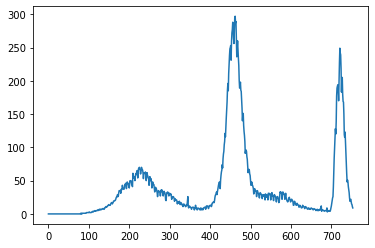

In [ ]:
plt.plot(df_ind['date'], df_ind['new_cases_per_million'])

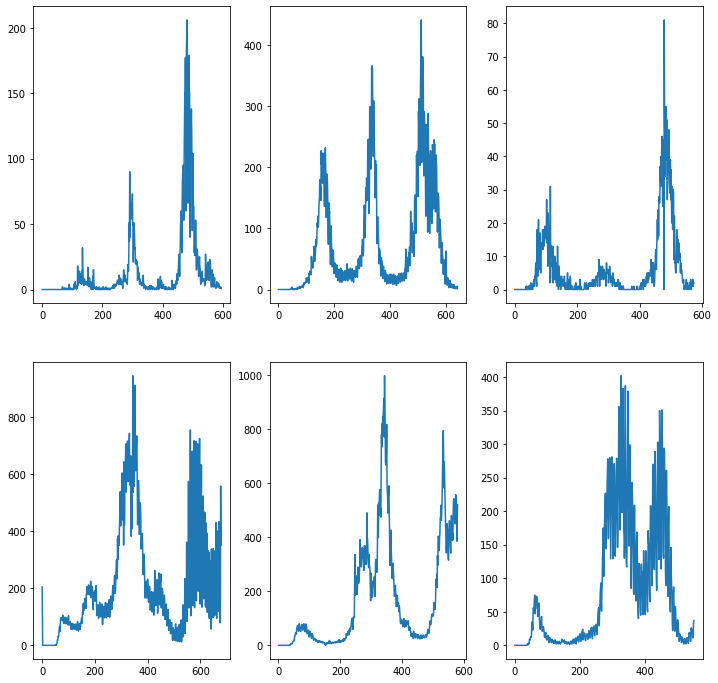

In [ ]:
plt.rcParams['figure.figsize'] = [12, 12]

plt.subplot(2, 3, 1)
plt.plot(df_zim['date'], df_zim['new_cases_per_million'])

plt.subplot(2, 3, 2)
plt.plot(df_sa['date'], df_sa['new_cases_per_million'])

plt.subplot(2, 3, 3)
plt.plot(df_afg['date'], df_afg['new_cases_per_million'])

plt.subplot(2, 3, 4)
plt.plot(df_us['date'], df_us['new_cases_per_million'])

plt.subplot(2, 3, 5)
plt.plot(df_uk['date'], df_uk['new_cases_per_million'])

plt.subplot(2, 3, 6)
plt.plot(df_ger['date'], df_ger['new_cases_per_million'])

plt.show()